# SYR Figure SPM.2a - TXx maps

See also:
- [Figure_11.11_TXx_map](Figure_11.11_TXx_map.ipynb) (same figure with slightly different layout for AR6 WGI Chapter 11)

Author: Mathias Hauser

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import conf
from utils import computation, plot, save_figuredata

mpl.rcParams["figure.dpi"] = 200
mpl.rcParams['font.sans-serif'] = "Liberation Sans Narrow"
mpl.rcParams['font.sans-serif'] = "Arial"

In [2]:
FIGURE_FOLDER = "SYR_Figure_SPM.2a_TXx_map"

## Load data

### global mean tas

In [3]:
c6_tas = conf.cmip6.load_post_all_concat(varn="tas", postprocess="global_mean")

 -- {'varn': 'tas', 'postprocess': 'global_mean', 'table': 'Amon', 'model': 'IITM-ESM', 'exp': 'ssp370', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}: no data for 2099 - 2099 (1850..2098)


In [4]:
c6_txx_reg = conf.cmip6.load_post_all_concat(
    varn="tasmax", postprocess="txx_reg_ave_ar6", anomaly="no_anom"
)

-- no data found for: {'exp': 'historical', 'varn': 'tasmax', 'postprocess': 'txx_reg_ave_ar6', 'table': 'day', 'model': 'EC-Earth3', 'ens': 'r4i1p1f1', 'grid': 'gr', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'tasmax', 'postprocess': 'txx_reg_ave_ar6', 'table': 'day', 'model': 'IITM-ESM', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'tasmax', 'postprocess': 'txx_reg_ave_ar6', 'table': 'day', 'model': 'GISS-E2-1-G', 'ens': 'r1i1p5f2', 'grid': 'gn', 'ensnumber': 0}
 -- {'varn': 'tasmax', 'postprocess': 'txx_reg_ave_ar6', 'table': 'day', 'model': 'BCC-ESM1', 'exp': 'ssp370', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}: no data for 2099 - 2099 (1850..2055)
 -- {'varn': 'tasmax', 'postprocess': 'txx_reg_ave_ar6', 'table': 'day', 'model': 'MPI-ESM-1-2-HAM', 'exp': 'ssp370', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}: no data for 2099 - 2099 (1850..2055)


In [5]:
c6_txx = conf.cmip6.load_post_all_concat(
    varn="tasmax",
    postprocess="txx_regrid",
)

-- no data found for: {'exp': 'historical', 'varn': 'tasmax', 'postprocess': 'txx_regrid', 'table': 'day', 'model': 'EC-Earth3', 'ens': 'r4i1p1f1', 'grid': 'gr', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'tasmax', 'postprocess': 'txx_regrid', 'table': 'day', 'model': 'IITM-ESM', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'tasmax', 'postprocess': 'txx_regrid', 'table': 'day', 'model': 'GISS-E2-1-G', 'ens': 'r1i1p5f2', 'grid': 'gn', 'ensnumber': 0}
 -- {'varn': 'tasmax', 'postprocess': 'txx_regrid', 'table': 'day', 'model': 'BCC-ESM1', 'exp': 'ssp370', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}: no data for 2099 - 2099 (1850..2055)
 -- {'varn': 'tasmax', 'postprocess': 'txx_regrid', 'table': 'day', 'model': 'MPI-ESM-1-2-HAM', 'exp': 'ssp370', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}: no data for 2099 - 2099 (1850..2055)


In [6]:
warming_levels = [1.5, 2.0, 4.0]

c6_at_warming_txx = computation.at_warming_levels_list(
    c6_tas, c6_txx, warming_levels=warming_levels
)

In [7]:
warming_levels_4 = [1.5, 2.0, 3.0, 4.0]

c6_at_warming_txx_4 = computation.at_warming_levels_list(
    c6_tas, c6_txx, warming_levels=warming_levels_4
)

In [8]:
colors = [
    [0.776, 0.859, 0.937],
    [0.998, 0.917, 0.878],
    [0.996, 0.869, 0.811],
    [0.991, 0.791, 0.708],
    [0.988, 0.712, 0.607],
    [0.988, 0.626, 0.508],
    [0.987, 0.541, 0.416],
    [0.985, 0.458, 0.332],
    [0.972, 0.367, 0.259],
    [0.947, 0.268, 0.196],
    [0.890, 0.186, 0.153],
    [0.815, 0.112, 0.122],
    [0.736, 0.080, 0.101],
    [0.657, 0.061, 0.084],
    [0.534, 0.031, 0.068],
    [0.404, 0.000, 0.051],
]

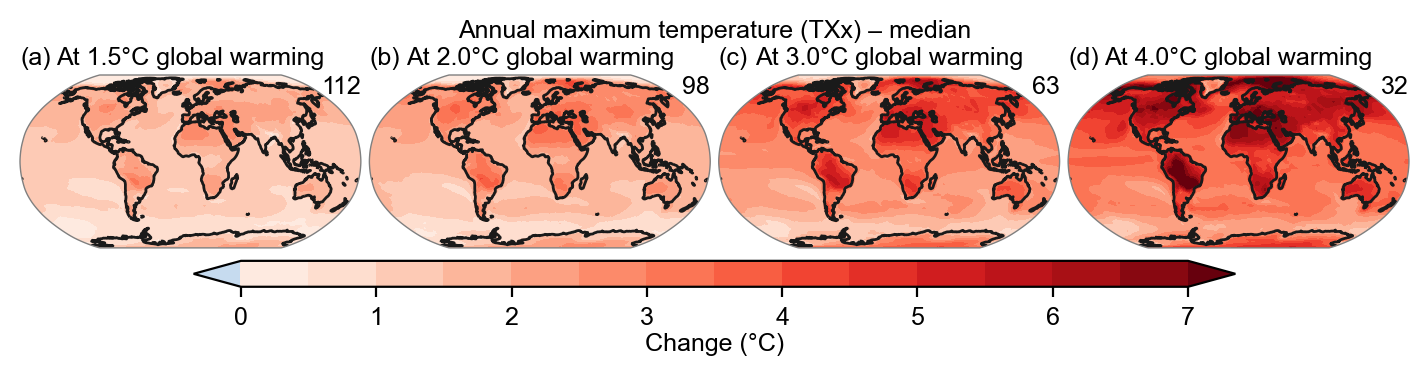

In [9]:
levels = np.arange(0, 7.1, 0.5)
varn = "TXx"

# levels = None
cbar = plot.at_warming_level_one_4(
    c6_at_warming_txx_4,
    "Change (°C)",
    "Annual maximum temperature (TXx)",
    levels=levels,
    average="median",
    colorbar=True,
    robust=True,
    colors=colors,
    extend="both",
    skipna=False,
    add_legend=False,
    hatch_simple=None,
    plotfunc="contourf",
)


fN = conf.cmip6.figure_filename(
    f"SYR_Figure_SPM.2a_cmip6_{varn}", FIGURE_FOLDER, add_prefix=False
)

plt.savefig(fN + ".pdf", dpi=300)
plt.savefig(fN + ".svg", dpi=300)
plt.savefig(fN + ".eps", dpi=300)
plt.savefig(fN + ".png", dpi=300, transparent=False, facecolor="w")

# save figure data


sfd = save_figuredata.SaveFiguredata(
    figure="Figure SPM.2a", units="°C", varn=varn, chapter="SYR"
)


for i, warming_level in enumerate([1.5, 2.0, 3.0, 4.0]):

    fN = conf.cmip6.figure_filename(
        f"SYR_Figure_SPM.2a_cmip6_{varn}_change_at_{warming_level:0.1f}C.nc",
        FIGURE_FOLDER,
        "figure_data",
        add_prefix=False,
    )

    da = c6_at_warming_txx_4[i]
    da.attrs["long_name"] = "Annual maximum temperature"
    da.attrs["comment"] = "anomaly wrt 1850-1900"

    ds = sfd.map_panel(
        da=da,
        average="median",
        panel="a",
        warming_level=warming_level,
        hatch_simple=0.8,
    )
    ds.to_netcdf(fN)